In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# Welcome to a full guide on Naïve Bayes Classifier 😶👌

#### Even the name of the algorithm sounds cute right? Naïve. What is so Naïve about it? 
#### For those of you who are unfamiliar with the word [Naïve](https://www.merriam-webster.com/dictionary/naive), it is a French adjective meaning 'innocent'.
#### That is the best I can explain so please don't come at me for poor translation. 
#### I do better at math and science than literature 😅

#### Now even if you have heard of this word, the algorithm itself might not be familiar to you as this algorithm, I believe, requires the user to have some previous mathematical background to truly understanding its workings. 
#### However, fret not! I can guarantee you after some simple explanation, you would find out that this algorithm only looks daunting on the outside. 
#### A point I would also like to convey to you is that for this algorithm, it is extremely crucial you pay close attention to its assumptions and conditions, as it may spell disaster if you don't.

### Without further ado, let us begin!

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1461896836934-ffe607ba8211?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8c3RhcnR8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60" style="width:50%;height:50%;margin:auto;"> </div>

# 1. Introduction

#### Naïve Bayes Classifier is a supervised learning model and one that is used for classification tasks. 
#### Some of the areas that the Naïve Bayes Classifier is mostly used in are text classification tasks, sentiment analysis, spam filtering and recommendation systems.
#### Also, Naïve Bayes Classifier is a probabilistic model that is built on the famous Bayes Theorem, formulated by Thomas Bayes.

<div style="width:100%;text-align: center;"> <img align=middle src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif" style="width:20%;height:20%;margin:auto;"> </div>

#### Bayes Theorem? What's that? 
#### This is why I mentioned earlier that to understand this model, one may require prior mathematical knowledge on the concept of Bayes Theorem, prior and likelihood.
#### If you are unfamiliar with these concepts, I got you! 
#### I will explain it right away.

# 2. Bayes Theorem

#### Before I introduce any formula, allow me to give you the single statement summing up this whole algorithm.
#### Simply put, this algorithm is asking "Given these features, does this measurement belong to class A or B?".
#### There can be more than two classes but this is the general statement behind this algorithm.

#### Now that is out of the way, allow me to introduce to you the Bayes Theorem.

$$\LARGE P(A|{B}) =  \frac {P(B|A)P({A})}{P({B})} $$

#### Now $\large P(A|{B}) $ is read as probability of A happening given that B has happened and is known as the posterior.
#### Furthermore $\large P(B|{A}) $ is known as the likelihood, $\large P(A) $ is known as the prior and $\large P(B) $ is known as the marginal.

#### Here is where you have to pay attention because I will be telling you the assumptions for this algorithm. 
#### The **two assumptions** are that 
#### **1**. The presence of one feature does not affect the others (Independence of features)
#### **2**. Each feature has an equal contribution to the outcome.

#### As you can tell intuitively, this two assumptions are extremely important as they are very fragile in reality, yet play a huge role in this algorithm.
#### In reality, we cannot say confidently that features are totally independent and neither can we conclude that each features have an equal weightage in the outcome.
#### However, this two assumptions are necessary for this algorithm to work out and is the reason for its simplicity and ubiquitousness.

#### Furthermore, the word Naïve that I've been talking about since the start of this notebook can be explained by the first assumption. We are naively assuming that the features are independent from each other. 
#### I'll soon show you where this assumption gets utilized in the calculation.

# 3. Calculating with Bayes Theorem

#### The whole point of this algorithm is to obtain the class with the **highest probability**. 
#### But that is too vague right? What probability are you talking about? 
#### This probabilty is the probability of the data belonging to a certain class when possessing the respective features.

$$\LARGE P(y \mid x_1, \dots, x_n) = \frac{ P(x_1, \dots, x_n \mid y)P(y)}
                                 {P(x_1, \dots, x_n)} $$

#### where $\large x_1, \dots, x_n $ refers to the different features in the dataset and $\large y $ refers to the different possible classes.

#### Now this is where the assumption of independence kicks in (and it is REALLY HUGE).

$$\LARGE P(y \mid x_1, \dots, x_n) = \frac{ P(x_1\mid y) P(x_2\mid y) \dots P(x_n\mid y) P(y)}
                                 {P(x_1)P(x_2) \dots P(x_n)} $$

#### and since $\large {P(x_1)P(x_2) \dots P(x_n)} $ is a constant, the whole equation can be simplified as follows.

$$\LARGE P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

#### Since the denominator is merely a normalizing function, we can just use proportionality to compare which has the highest probability.
#### After all, we are not aiming to obtain an absolute probability value, but a comparitively larger probability value.

$$\LARGE \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y) $$

#### This final form summarises our aim, to find the class (y) with the highest probability.

#### Now to get in the nitty gritty of this equation, $\large P(y) $ can easily found as it is the probability of a certain class. Just a simple fraction will do.
#### However, the likelihood, $\large P(x_i|y) $ is the complex part.
#### But not to worry, I've got your back and I'll dive deeper to introduce to you the different types of Naive Bayes.

# 4. Types of Naive Bayes Classifier

#### Now to obtain the likelihoods, we need to know the distribution of it.
#### The three most common distributions used are Multinomial, Bernoulli and Gaussian.

#### Allow me to give you a brief introduction of these three distributions.
#### Multinomial Naive Bayes is just what it sounds like. It is mostly used when there are discrete number of possible outcomes.
#### Bernoulli Naive Bayes is similar to the previous one but is used when the outcome is of a binary type, only two possible value.
#### Gaussian Naive Bayes, also known as the Normal distribution, is used when features are assumed to have continuous values from a gaussian distribution.
#### If you want to read up more about other possible types or into the details of these three above, feel free to check out the [sklearn website](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)!

#### Allow me to just illustrate to you the likelihood of a Gaussian Naive Bayes Classifier.
#### This is applicable when likelihood of the features is assumed to be Gaussian.

$$\LARGE P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right) $$

#### The parameters $\large \sigma_y $ and $\large \mu_y $ are estimated using maximum likelihood.

# 5. Naïve Bayes Classifier From Scratch

#### Now that I have elaborated on how the theory works, allow me to demonstrate to you how the theory would be applied in code.
#### We would utilize the famous iris dataset for our classification work.

In [2]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
38,4.4,3.0,1.3,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
34,4.9,3.1,1.5,0.1,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa


#### As you can observe from the above dataframe, the features/values are continuous values, prompting us to utilize the well-known Gaussian distribution to estimate the parameters for the likelihood function.
#### In order to do that, we would need to know its mean and variance, since those two are the parameters in the distribution.

In [3]:
def statistics(dataframe, target):
    
    mean = dataframe.groupby(target).mean().to_numpy()
    var = dataframe.groupby(target).apply(np.var).to_numpy()
              
    return mean,var

#### Now let us build up a function to convert the above Gaussian Density Function to workable code.

In [4]:
def gaussian_density(class_idx, x, mean, var):    # class_idx 0 for setosa, 1 for versicolor, 2 for virginica
    mean = mean[class_idx]
    var = var[class_idx]
    numerator = np.exp(-1 * ( ((x-mean)**2) / (2*(var**2))) )
    denominator = np.sqrt(2 * np.pi * (var**2))
    prob = numerator / denominator
    return prob

In [5]:
classes = df.species.unique().tolist() # A list of classes that the dataset has

#### Now to calculate the prior that we need and the final calculation of the posterior, which **REMEMBER**, is our goal.

In [6]:
def prior(dataframe, target):
    prior = (dataframe.groupby(target).apply(lambda x: len(x))/len(df)).to_numpy()
    return prior

def posterior(x,df,target,mean,var,prior):
    posteriors = []
    for i in range(df.groupby(target).ngroups):
        pri = prior[i] 
        likelihood = np.prod(gaussian_density(i,x.astype(float), mean, var))
        posterior = pri * likelihood
        posteriors.append(posterior)
    return np.argmax(posteriors)

#### To finish it all off, we would need the fitting and predicting function.

In [7]:
def fit(df,target):
    mean,var = statistics(df, target)
    mean = mean.astype(float)
    var = var.astype(float)
    pri = prior(df, target)
    pri = pri.astype(float)
    return mean,var,pri
        
def predict(df,target,mean,var,prior,classes):
    prediction = []
    for x in df.iloc[:,:4].to_numpy():
        prediction.append(classes[posterior(x,df,target,mean,var,prior)])
    return prediction

#### Now all the necessary functions are written down, let us check whether it works out as expect it to!

In [8]:
# To calculate the necessary statistics
mean,var,pri = fit(df,'species')

# Obtain the predictions
pred = predict(df,'species',mean,var,pri,classes)

#### Ok! So we know that our code works, but it would be nice to take a look at the accuracy, won't it?

In [9]:
def accuracy(df,pred):
    true_answer = df.species.to_numpy().tolist()
    correct = 0
    for i in range(len(true_answer)):
        if true_answer[i] == pred[i]:
            correct += 1
    return int(correct/len(true_answer)*100)

print("{}%".format(accuracy(df,pred)))

94%


#### Let us compare this to the accuracy of the Scikit Learn's model.

In [10]:
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:,:4]
y = df.iloc[:,-1]

clf = GaussianNB()
clf.fit(X, y)

print("{}%".format(int(clf.score(X,y)*100)))

96%


Text(0.5, 1.0, 'Accuracy comparison')

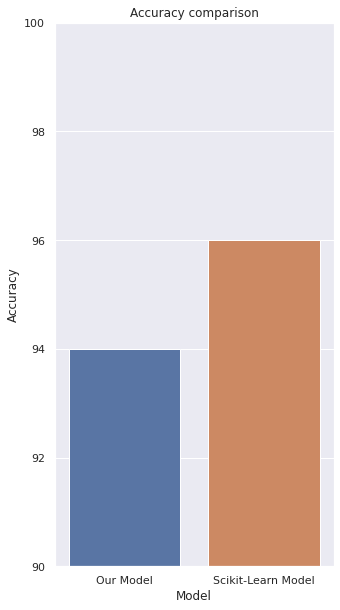

In [11]:
import seaborn as sns

data = {'Model': ['Our Model', 'Scikit-Learn Model'],
        'Accuracy': [accuracy(df,pred),int(clf.score(X,y)*100)]}
data = pd.DataFrame(data)

sns.set(rc={'figure.figsize':(5,10)})
ax = sns.barplot(x='Model', y='Accuracy',data=data)
ax.set(ylim=[90,100])
ax.set_title('Accuracy comparison')

#### I mean just 94% by itself is extraordinary! 
#### Of course, this dataset is a simple one, so the power of the model might need to be tested on a much more difficult dataset.
#### However, compared to the 96% accuracy from the Scikit Learn's model, I would say our simple yet elegant Naïve Bayes Classifier from scratch did a fantastic job don't you think?

# 6. Conclusion

#### After all that explanation and practical illustration, doesn't this whole algorithm seem more approachable now?
#### As you can see for yourself, this algorithm is very intuitive, simple and does not require too much hyperparameter tuning unlike other more complex models.
#### It is also built on the famous Bayes Theorem, making it simpler for people to understand what is going on behind the scenes.

#### However, this algorithm definitely has its flaws. 
#### With this algorithm, there exists a problem called "Zero Frequency Problem" where the frequencies for certain features or observations turn out to be 0. This may result in mathematical errors but [can be overcome](https://towardsdatascience.com/continuous-data-and-zero-frequency-problem-in-naive-bayes-classifier-7784f4066b51) rather simply.
#### Furthermore, as I have mentioned earlier, the fragile assumptions can be damning when it isn't met, and that by itself is a high bar. 
#### But if one keeps an eye out for these potential pitfalls, Naïve Bayes Classifier can be a powerful weapon in ones machine learning arsenal.

# 7. Credit

* https://blog.devgenius.io/implementing-na%C3%AFve-bayes-classification-from-scratch-with-python-badd5a9be9c3
* https://towardsdatascience.com/a-mathematical-explanation-of-naive-bayes-in-5-minutes-44adebcdb5f8
* https://medium.com/@abhishek.km23/naive-bayes-classifier-calculation-of-prior-likelihood-evidence-posterior-74d7d27eec24
* https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/
* https://towardsdatascience.com/whats-so-naive-about-naive-bayes-58166a6a9eba
* https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
* https://towardsdatascience.com/continuous-data-and-zero-frequency-problem-in-naive-bayes-classifier-7784f4066b51
* https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41